In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width: 90% !important; }</style>'))

import warnings
warnings.filterwarnings('ignore')

In [2]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [3]:
peaks = pd.read_csv("intersecting_peaks.csv", sep="\t")['x'].tolist()
peaks[:3]

['chr1-762062-762562', 'chr1-762677-763177', 'chr1-777426-777926']

In [4]:
query = ad.read('h5ad/query.h5ad')
query = query[query.obs.index.tolist(), peaks]
query

View of AnnData object with n_obs × n_vars = 3114 × 162505
    obs: 'orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'query.cellNames', 'query.clone', 'input', 'predicted.predicted.celltype.score', 'predicted.predicted.celltype'
    var: 'count', 'percentile'
    obsm: 'X_lsi', 'X_query.umap', 'X_ref.lsi', 'X_ref.umap'
    varm: 'LSI'

In [5]:
ref = ad.read('h5ad/ref.h5ad')
ref = ref[ref.obs.index.tolist(), peaks]
ref

View of AnnData object with n_obs × n_vars = 33819 × 162505
    obs: 'orig.ident', 'rownames.ref.colData.', 'ref.colData.BioClassification', 'rownames.ref.colData', 'input', 'nCount_ATAC', 'nFeature_ATAC'
    var: 'count', 'percentile'
    obsm: 'X_lsi', 'X_umap'
    varm: 'LSI'

In [6]:
query.obs['predicted.id'] = query.obs['predicted.predicted.celltype'].astype("category")
sorted(query.obs['predicted.id'].value_counts().index)

['01_HSC',
 '02_Early.Eryth',
 '03_Late.Eryth',
 '04_Early.Baso',
 '05_CMP.LMPP',
 '06_CLP.1',
 '07_GMP',
 '08_GMP.Neut',
 '09_pDC',
 '11_CD14.Mono.1',
 '12_CD14.Mono.2',
 '15_CLP.2',
 '16_Pre.B',
 '17_B',
 '18_Plasma',
 '19_CD8.N',
 '20_CD4.N1',
 '21_CD4.N2',
 '22_CD4.M',
 '23_CD8.EM',
 '24_CD8.CM',
 '25_NK']

In [7]:
ref.obs['ref.colData.BioClassification'] = ref.obs['ref.colData.BioClassification'].astype("category")
sorted(ref.obs['ref.colData.BioClassification'].value_counts().index)

['01_HSC',
 '02_Early.Eryth',
 '03_Late.Eryth',
 '04_Early.Baso',
 '05_CMP.LMPP',
 '06_CLP.1',
 '07_GMP',
 '08_GMP.Neut',
 '09_pDC',
 '10_cDC',
 '11_CD14.Mono.1',
 '12_CD14.Mono.2',
 '15_CLP.2',
 '16_Pre.B',
 '17_B',
 '18_Plasma',
 '19_CD8.N',
 '20_CD4.N1',
 '21_CD4.N2',
 '22_CD4.M',
 '23_CD8.EM',
 '24_CD8.CM',
 '25_NK']

In [8]:
colors = {}
colors['01_HSC']         = '#C62E36'
colors['02_Early.Eryth'] = '#2E2B54'
colors['03_Late.Eryth']  = '#2A734C'
colors['04_Early.Baso']  = '#AA7A39'
colors['05_CMP.LMPP']    = '#60466E'
colors['06_CLP.1']       = '#B95D53'
colors['07_GMP']         = '#F1AC3C'
colors['08_GMP.Neut']    = '#BBBD64'
colors['09_pDC']         = '#8981B0' 
colors['10_cDC']         = '#B675A5'
colors['11_CD14.Mono.1'] = '#C9B4C9'
colors['12_CD14.Mono.2'] = '#81CAC9'
colors['13_Unk']         = '#AAB4BE'
colors['14_Unk']         = '#AAB4BE'
colors['15_CLP.2']       = '#79BE6F'
colors['16_Pre.B']       = '#D67E70'
colors['17_B']           = '#9B7599'
colors['18_Plasma']      = '#2F4072'
colors['19_CD8.N']       = '#AC5C57'
colors['20_CD4.N1']      = '#6D8068'
colors['21_CD4.N2']      = '#547D91'
colors['22_CD4.M']       = '#455883'
colors['23_CD8.EM']      = '#2A4D4F'
colors['24_CD8.CM']      = '#772F2C'
colors['25_NK']          = '#B68F61'
colors['26_Unk']         = '#AAB4BE'

In [9]:
reordered = sorted(query.obs['predicted.id'].value_counts().index)

query.obs['predicted.id'].cat.reorder_categories(reordered, inplace=True)
ordered_colors_q = {}
for cl in query.obs['predicted.id'].cat.categories.tolist():
    ordered_colors_q[cl] = colors[cl]
ordered_colors_q = list(ordered_colors_q.values())

In [10]:
reordered = sorted(ref.obs['ref.colData.BioClassification'].value_counts().index)

ref.obs['ref.colData.BioClassification'].cat.reorder_categories(reordered, inplace=True)
ordered_colors_r = {}
for cl in ref.obs['ref.colData.BioClassification'].cat.categories.tolist():
    ordered_colors_r[cl] = colors[cl]
ordered_colors_r = list(ordered_colors_r.values())

In [11]:
query.obs['query.clone'] = query.obs['query.clone'].astype("category")
sorted(query.obs['query.clone'].value_counts().index)

['T', 'TA', 'TAR', 'TARB1', 'TARB2', 'no-somatic-mut']

In [12]:
colors = {}
colors['T']              = '#26305B'
colors['TA']             = '#2A864A'
colors['TAR']            = '#743681'
colors['TARB1']          = '#E77A3E'
colors['TARB2']          = '#F8E43A'
colors['no-somatic-mut'] = '#C62E36'

In [13]:
reordered = sorted(query.obs['query.clone'].value_counts().index)

query.obs['query.clone'].cat.reorder_categories(reordered, inplace=True)
ordered_colors_clone = {}
for cl in query.obs['query.clone'].cat.categories.tolist():
    ordered_colors_clone[cl] = colors[cl]
ordered_colors_clone = list(ordered_colors_clone.values())

In [14]:
df = pd.read_csv("barcodes/for_simo_clusters.csv", sep=',')
df = df.set_index("cell_ID", drop=True)
df_dict = df.to_dict()

In [15]:
query.obs.index = "AML#"+query.obs.index.astype('str')

In [16]:
clusters = []
for cell in query.obs.index.tolist():
    if cell in list(df_dict['cluster'].keys()):
        clusters.append(df_dict['cluster'][cell])
    else:
        clusters.append("Undefined")

In [17]:
query.obs['clusters'] = clusters
query.obs['clusters'] = query.obs['clusters'].astype("category")
sorted(query.obs['clusters'].value_counts().index)

['GMP-like-1',
 'GMP-like-2',
 'HSC/MPP',
 'LMPP-like-1',
 'LMPP-like-2',
 'Mk-EP',
 'Pre-B',
 'T-cells',
 'Undefined']

In [18]:
colors = {}
colors['GMP-like-1']  = '#E77A3E'
colors['GMP-like-2']  = '#AB659B'
colors['HSC/MPP']     = '#2A864A' 
colors['LMPP-like-1'] = '#F8E43A'
colors['LMPP-like-2'] = '#7990BC'
colors['Mk-EP']       = '#26305B'
colors['Pre-B']       = '#743681'
colors['T-cells']     = '#C62E36'
colors['Undefined']   = '#AAB4BE'

In [19]:
reordered = sorted(query.obs['clusters'].value_counts().index)

query.obs['clusters'].cat.reorder_categories(reordered, inplace=True)
ordered_colors_sven = {}
for cl in query.obs['clusters'].cat.categories.tolist():
    ordered_colors_sven[cl] = colors[cl]
ordered_colors_q = list(ordered_colors_sven.values())

In [20]:
query_query = query.copy()
query_query.obsm['X_umap'] = query_query.obsm['X_query.umap']

In [21]:
query_ref = query.copy()
query_ref.obsm['X_umap'] = query_ref.obsm['X_ref.umap']

No handles with labels found to put in legend.


No handles with labels found to put in legend.


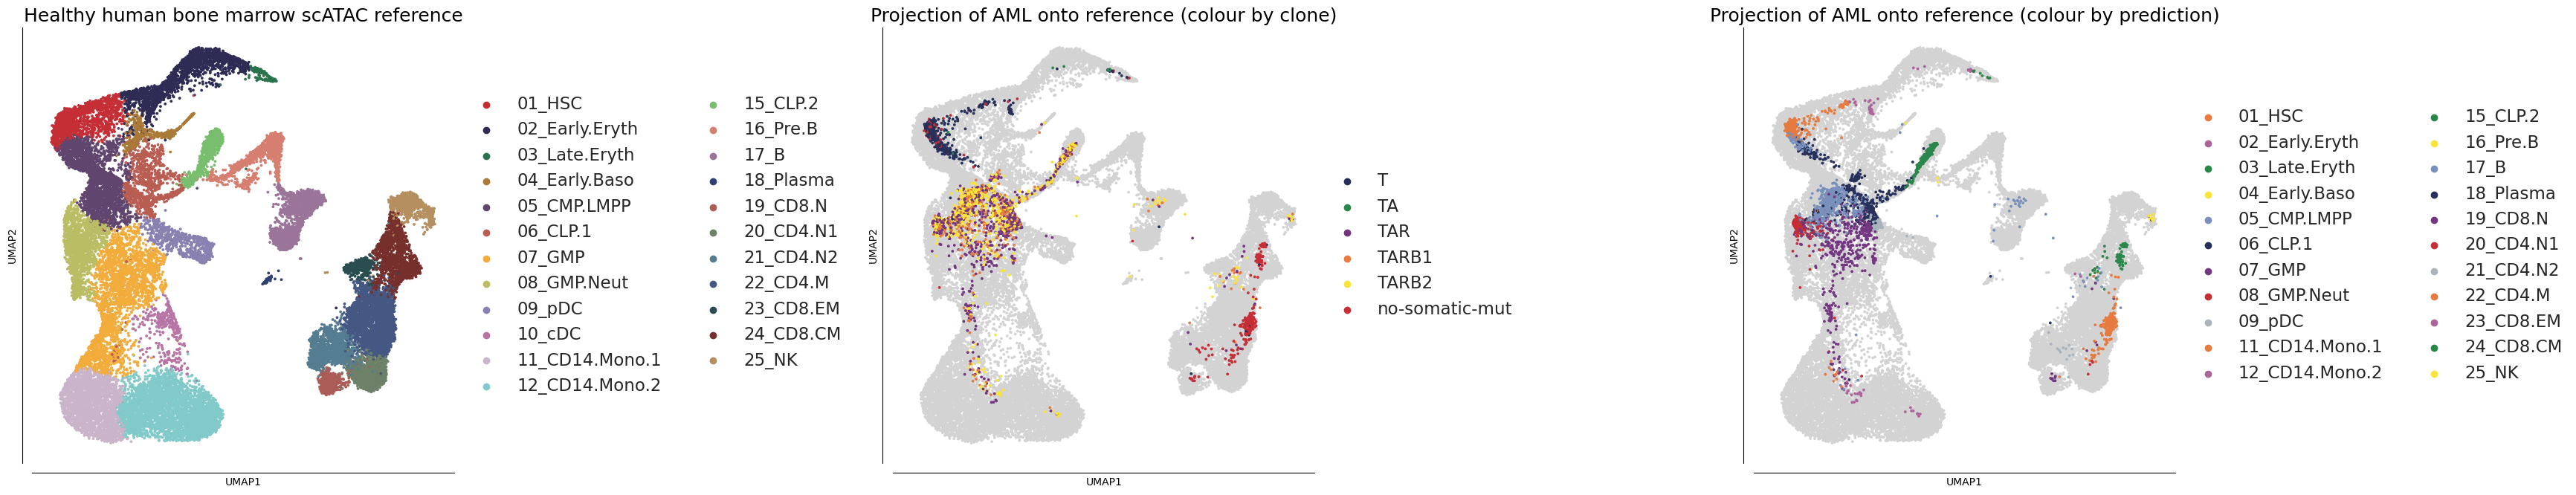

In [22]:
f, axs = plt.subplots(1,3,figsize=(35,7), sharey=True)
sns.set(font_scale=1.5)
sns.set_style("white")

sc.pl.umap(ref, color='ref.colData.BioClassification', ax=axs[0], 
           size=30, components=['1,2'], show=False, palette=ordered_colors_r, 
           legend_loc='right margin', na_in_legend=None, title='Healthy human bone marrow scATAC reference')

sc.pl.umap(ref, color='ref.colData.BioClassification', groups=['a'], ax=axs[1], 
           size=30, components=['1,2'], show=False, palette=ordered_colors_clone,
           legend_loc='right margin', na_in_legend=None, title='Projection of AML onto reference (colour by clone)')

sc.pl.umap(query_ref, color='query.clone', ax=axs[1], 
           size=30, components=['1,2'], show=False, palette=ordered_colors_clone,
           legend_loc='right margin', na_in_legend=None, title='Projection of AML onto reference (colour by clone)')

sc.pl.umap(ref, color='ref.colData.BioClassification', groups=['a'], ax=axs[2], 
           size=30, components=['1,2'], show=False, palette=ordered_colors_q,
           legend_loc='right margin', na_in_legend=None, title='Projection of AML onto reference (colour by prediction)')

sc.pl.umap(query_ref, color='predicted.id', ax=axs[2], 
           size=30, components=['1,2'], show=False, palette=ordered_colors_q,
           legend_loc='right margin', na_in_legend=None, title='Projection of AML onto reference (colour by prediction)')


# axs[0].legend().set_visible(False)
# axs[1].legend(loc='upper right', bbox_to_anchor=(1, .8), frameon=False)
sns.despine(offset=10, trim=False)

plt.tight_layout()
plt.show(block=False)
# f.savefig("umap/one.pdf", bbox_inches='tight')


In [23]:
query_query = query_query[query_query.obs['clusters']!="Undefined"]
query_ref   = query_ref[query_ref.obs['clusters']!="Undefined"]

No handles with labels found to put in legend.


No handles with labels found to put in legend.


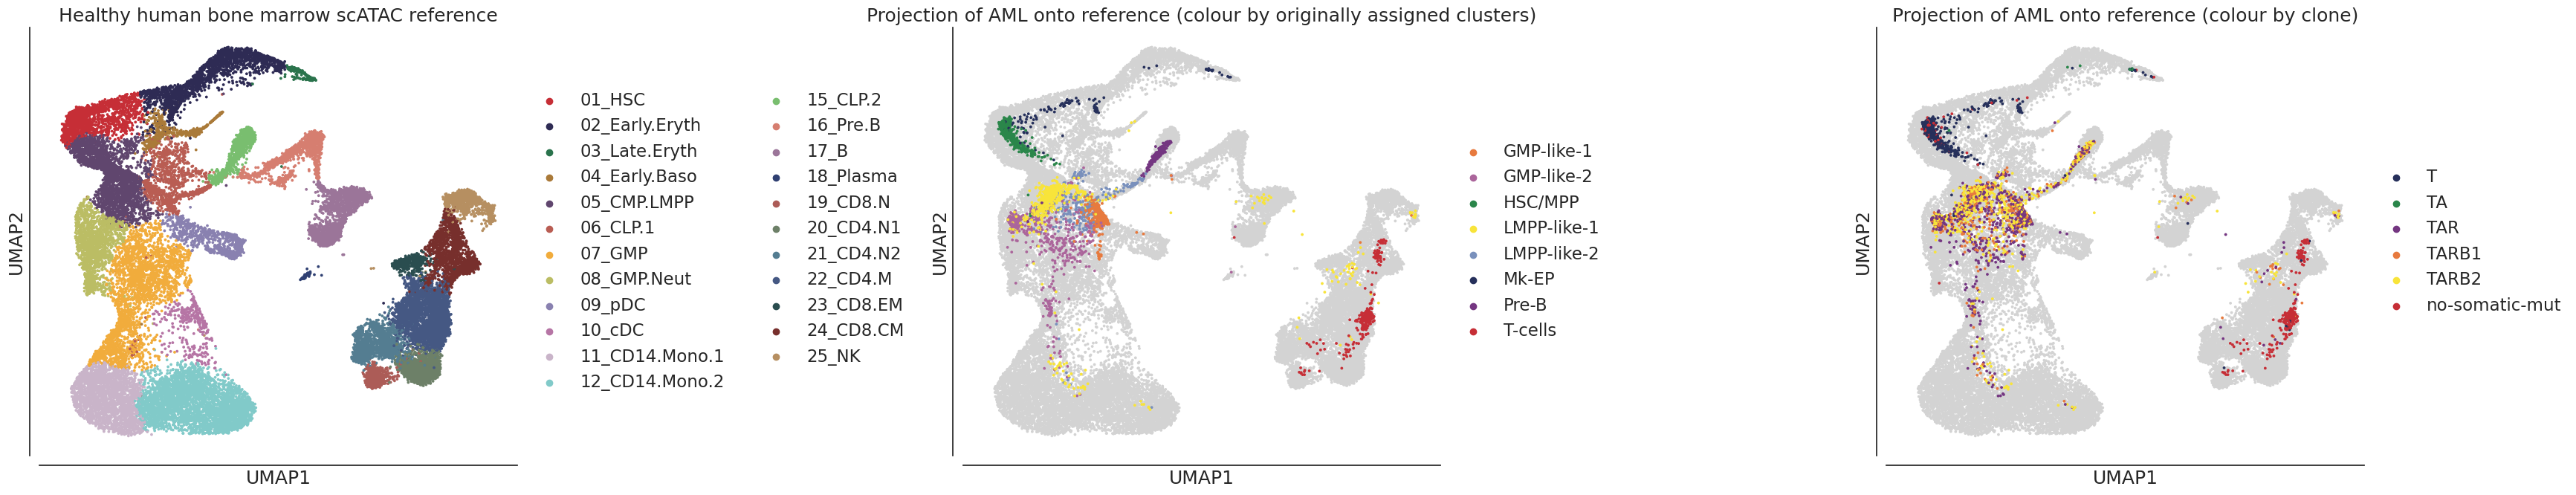

In [24]:
f, axs = plt.subplots(1,3,figsize=(35,7), sharey=True)
sns.set(font_scale=1.5)
sns.set_style("white")

sc.pl.umap(ref, color='ref.colData.BioClassification', ax=axs[0], 
           size=30, components=['1,2'], show=False, palette=ordered_colors_r, 
           legend_loc='right margin', na_in_legend=None, title='Healthy human bone marrow scATAC reference')

sc.pl.umap(ref, color='ref.colData.BioClassification', groups=['a'], ax=axs[1], 
           size=30, components=['1,2'], show=False, palette=ordered_colors_clone,
           legend_loc='right margin', na_in_legend=None, title='Projection of AML onto reference (colour by originally assigned clusters)')

sc.pl.umap(query_ref, color='clusters', ax=axs[1], 
           size=30, components=['1,2'], show=False, palette=ordered_colors_sven,
           legend_loc='right margin', na_in_legend=None, title='Projection of AML onto reference (colour by originally assigned clusters)')

sc.pl.umap(ref, color='ref.colData.BioClassification', groups=['a'], ax=axs[2], 
           size=30, components=['1,2'], show=False, palette=ordered_colors_clone,
           legend_loc='right margin', na_in_legend=None, title='Projection of AML onto reference (colour by clone)')

sc.pl.umap(query_ref, color='query.clone', ax=axs[2], 
           size=30, components=['1,2'], show=False, palette=ordered_colors_clone,
           legend_loc='right margin', na_in_legend=None, title='Projection of AML onto reference (colour by clone)')


# axs[0].legend().set_visible(False)
# axs[1].legend(loc='upper right', bbox_to_anchor=(1, .8), frameon=False)
sns.despine(offset=10, trim=False)

plt.tight_layout()
plt.show(block=False)
# f.savefig("umap/two.pdf", bbox_inches='tight')
